<a href="https://colab.research.google.com/github/richeym-umich/workshops/blob/main/Advanced_ML_Topics/Advanced_Machine_Learning_Topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Classification**

First, we're going to look at a classification example. We're going to use the K nearest neighbors classifier from the scikit learn package to answer the question of whether or not a baseball team should play given the weather and temperature conditions.

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

First, we need to organize the known data into features. The following arrays represent actual weather conditions and whether or not the team played in those conditions. Weather and temperature are considered our features, while play is considered our "target", or answer.  

In [ ]:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

Next, we need to numerically represent our data so that it can be fed as inputs to our classifier. A Label Encoder will change our string representations to numerical representations. 

In [ ]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


We convert our features and lables into numerical representations using our label encoder

In [ ]:
# converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

Then, we combine our features into a single list. You're able to combine as many features as you'd like into your features list to contribute to the overall determination. 

In [ ]:
#combining weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))

Now that we have our features ready, we can create our model

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)



Should the team play in these conditions?: ['Yes']


Finally, let's try using our model to predict whether the team should play in certain conditions

In [10]:
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Should the team play in these conditions?: " + str(le.inverse_transform(predicted)))

Should the team play in these conditions?: ['Yes']


### **Reinforcement Learning**



Next, we're going to look at a reinforcement learning example. In this example, we're going to teach a machine how to find the shortest distance between two points in a graph. 

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

First, we define a list of points by their connections

In [ ]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

Next, we add the points to a graph and visualize the graph

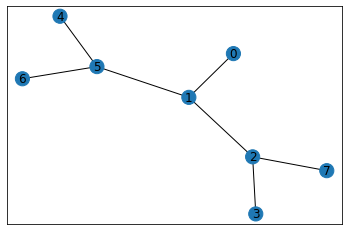

In [ ]:
goal = 7
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

Next, we create our reward matrix. If the machine reaches a goal location, we give it a reward. 

In [ ]:
MATRIX_SIZE = 8

#create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

#assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point]=0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0

R[goal,goal] = 100

Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


Next, we set our learning parameter. This is an important step in learning and will tell the machine how much to value rewards. 

In [ ]:
#learning parameter
gamma = 0.8

We define a function to get our available actions from our current location. 

In [ ]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

Next, we define a function to return an available action from the list of available actions

In [ ]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

We define a funciton to update the state of the machine with the action that we've chosen

In [ ]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]

    Q[current_state,action] = R[current_state, action] + gamma*max_value

    if(np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return(0)

Now that our code has been set up, we need to train our reinforcement learning model. To do this, we step through each of the functions. The machine will generate the list of all possible actions from its current state, randomly choose one of those actions, and take the reward or penalty from that action. 

In [ ]:
#Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)

print("Trained Q matrix: ")
print(Q/np.max(Q)*100)

Trained Q matrix: 
[[  0.          63.99999998   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19999998   0.          79.99999997   0.           0.
   51.19999998   0.           0.        ]
 [  0.          63.99999973   0.          63.99999998   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19999998   0.           0.        ]
 [  0.          63.99999998   0.           0.          40.95999998
    0.          40.95999998   0.        ]
 [  0.           0.           0.           0.           0.
   51.19999998   0.           0.        ]
 [  0.           0.          79.99999997   0.           0.
    0.           0.          99.99999998]]


Finally, we test our model and output the learning results. These results show that the model was able to learn the best route available after approximately 300 steps. 

Most efficient path: 
[0, 1, 2, 7]


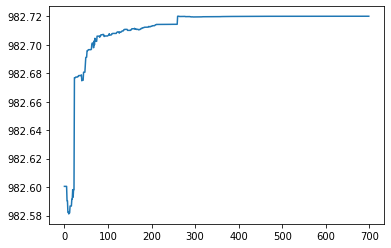

In [ ]:
#Testing
current_state=0
steps = [current_state]

while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
print("Most efficient path: ")
print(steps)

plt.plot(scores)
plt.show()

### Detecting Parkinsons Disease
We can use computer vision to detect signs of Parkinsons Disease in different drawings. In this example, we'll load the Parkinsons spiral and wave dataset and compare and contrast the effectiveness of using computer vision and machine learning.

First, we import our necessary packages. Note that we import a Random Forest Classifier, which we will use in this example. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from skimage import feature
from imutils import build_montages
from imutils import paths
import numpy as np
import argparse
import cv2
import os
from google.colab.patches import cv2_imshow

We define some utility functions to get the image characteristics and load the data. 

In [ ]:
def quantify_image(image):
  features = feature.hog(image, orientations=9, pixels_per_cell=(10,10), cells_per_block=(2,2), transform_sqrt=True, block_norm="L1")
  return features

def load_split(path):
  imagePaths = list(paths.list_images(path))
  data = []
  labels = []

  for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    print(imagePath)
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200,200))

    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    features = quantify_image(image)
    data.append(features)
    labels.append(label)

  return (np.array(data), np.array(labels))

Then we load the data from the dataset we previously uploaded to the notebook.  

In [ ]:
from zipfile import ZipFile
file_name = 'parkinsonDataset.zip'

with ZipFile(file_name, 'r') as zipped:
  zipped.extractall()
  print('Done')

Done


Next, we set the datapath and the number of trials we want to train the model for. 

In [ ]:
datasetPath = 'parkinsonDataset/spiral'
argTrials = 5

Then we split the training and testing data and load it into two separate variables.

In [ ]:
trainingPath = os.path.sep.join([datasetPath, 'training'])
testingPath = os.path.sep.join([datasetPath, 'testing'])
print('[INFO] loading data...')
(trainX, trainY) = load_split(trainingPath)
(testX, testY) = load_split(testingPath)

[INFO] loading data...
parkinsonDataset/spiral/training/parkinson/V05PE03.png
parkinsonDataset/spiral/training/parkinson/V14PE02.png
parkinsonDataset/spiral/training/parkinson/V11PE02.png
parkinsonDataset/spiral/training/parkinson/V03PE03.png
parkinsonDataset/spiral/training/parkinson/V14PE01.png
parkinsonDataset/spiral/training/parkinson/V03PE09.png
parkinsonDataset/spiral/training/parkinson/V15PE03.png
parkinsonDataset/spiral/training/parkinson/V07PE02.png
parkinsonDataset/spiral/training/parkinson/V08PE02.png
parkinsonDataset/spiral/training/parkinson/V01PE02.png
parkinsonDataset/spiral/training/parkinson/V01PE03.png
parkinsonDataset/spiral/training/parkinson/V15PE02.png
parkinsonDataset/spiral/training/parkinson/V07PE03.png
parkinsonDataset/spiral/training/parkinson/V12PE03.png
parkinsonDataset/spiral/training/parkinson/V09PE02.png
parkinsonDataset/spiral/training/parkinson/V09PE03.png
parkinsonDataset/spiral/training/parkinson/V03PE06.png
parkinsonDataset/spiral/training/parkinson

A Label Encoder allows us to numerically represent our input features. We can transform our input labels into numerical representations, i.e. 1 = Parkinsons Detected, 0 = Parkinsons not detected

In [ ]:
le = LabelEncoder()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

Then, we loop through each of the number of models we want to create and make a Random Forest Classifier. We run the predictions on the test set and generate a confusion matrix for the results. 

In [ ]:
trials = {}
for i in range(0, argTrials):
  print("[INFO] training model {} of {}...".format(i+1, argTrials))
  model = RandomForestClassifier(n_estimators=100)
  model.fit(trainX, trainY)

  predictions = model.predict(testX)
  metrics = {}

  cm = confusion_matrix(testY, predictions).flatten()
  (tn, fp, fn, tp) = cm
  metrics['acc'] = (tp+tn) /float(cm.sum())
  metrics['sensitivity'] = tp/float(tp+fn)
  metrics['specificity'] = tn/float(tn+fp)

  for (k,v) in metrics.items():
    l = trials.get(k,[])
    l.append(v)
    trials[k] = l 

[INFO] training model 1 of 5...
[INFO] training model 2 of 5...
[INFO] training model 3 of 5...
[INFO] training model 4 of 5...
[INFO] training model 5 of 5...


Finally, we ouptut the mean accuracy, sensitivity, and specificity of our models. Accuracy is the measure of how close the overall predictions are to the true predictions. Sensitivity is the probability of receiving a positive identification given that the patient truly does have Parkinsons. Specificity is the probability of receiving a negative identification given that the patient truly does not have Parkinsons. These are popular metrics for determining how well your model is performing. 

In [ ]:
for metric in ('acc', 'sensitivity', 'specificity'):
  values = trials[metric]
  mean = np.mean(values)
  std = np.std(values)

  print(metric)
  print('='*len(metric))
  print('u={:.4f}, o={:.4f}'.format(mean, std))
  print('')

acc
===
u=0.8333, o=0.0211

sensitivity
u=0.7600, o=0.0533

specificity
u=0.9067, o=0.0327



We can visualize some of our results to see the differences between predicted Parksions patients and predicted non-Parkinsons patients. 

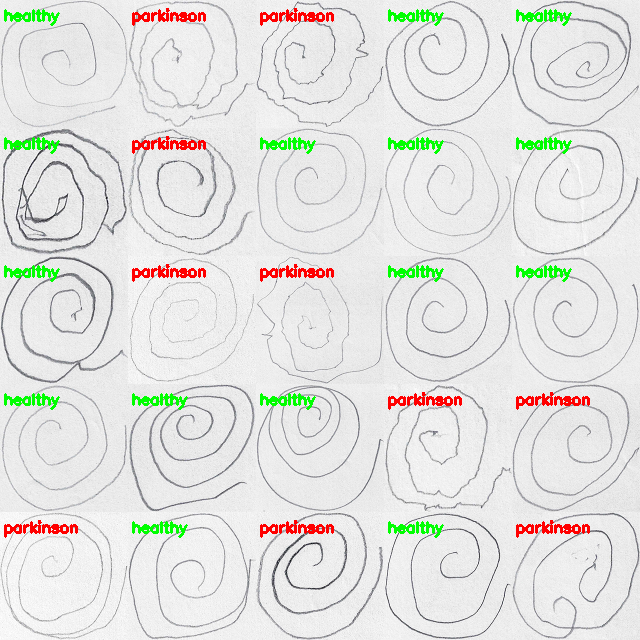

-1

In [ ]:
testingPaths = list(paths.list_images(testingPath))
idxs = np.arange(0, len(testingPaths))
idxs = np.random.choice(idxs, size=(25,), replace = False)
images = []

for i in idxs:
  image = cv2.imread(testingPaths[i])
  output = image.copy()
  output = cv2.resize(output, (128,128))

  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (200,200))
  image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

  features = quantify_image(image)
  preds = model.predict([features])
  label = le.inverse_transform(preds)[0]

  color = (0,255,0) if label == "healthy" else (0,0,255)
  cv2.putText(output, label, (3,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
  images.append(output)

montage = build_montages(images, (128,128), (5,5))[0]

cv2_imshow(montage)
cv2.waitKey(0)

### Clustering Example
Finally, we'll look at a clustering example using KMeans clustering. In this example, we will be trying to find groups of basketball players that share similar traits, based on their performance in games. 

First, we're going to import our necessary packages. Note that we import a KMeans cluster algorithm. We also import our data that was previously uploaded to the notebook.

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing
  
url = 'https://raw.githubusercontent.com/richeym-umich/workshops/main/Advanced_ML_Topics/basketball_data.csv'
df = pd.read_csv(url)
df.head()


,Player,GP,GS,PTS,FGM,FGA,FTM,FTA,3FGM,3FGA,OREB,DREB,AST,STL,BLK,TO,PF
0,1,16,14,13,4,4,5,9,0,6,10,13,3,7,9,10,0
1,2,172,139,26,12,9,2,7,0,9,26,5,14,9,3,6,0
2,3,168,72,6,3,14,0,5,0,5,25,12,1,1,5,0,5
3,4,175,84,22,4,8,14,19,0,10,23,10,8,7,13,7,4
4,5,169,46,1,0,15,1,5,0,8,22,30,10,0,19,4,0


Then we zip our features together into a feature list. If we only wanted to consider a portion of our features, we wouldn't include it in the features list

In [ ]:
features=list(zip(df['GP'],df['GS'], df['PTS'], df['FGM'], df['FTM'], df['FTA'], df['3FGM'], df['3FGA'], df['OREB'], df['DREB'], df['AST'], df['STL'], df['BLK'], df['TO'], df['PF']))
#features=list(zip(df['GP'],df['PTS']))
df.head()

,Player,GP,GS,PTS,FGM,FGA,FTM,FTA,3FGM,3FGA,OREB,DREB,AST,STL,BLK,TO,PF
0,1,16,14,13,4,4,5,9,0,6,10,13,3,7,9,10,0
1,2,172,139,26,12,9,2,7,0,9,26,5,14,9,3,6,0
2,3,168,72,6,3,14,0,5,0,5,25,12,1,1,5,0,5
3,4,175,84,22,4,8,14,19,0,10,23,10,8,7,13,7,4
4,5,169,46,1,0,15,1,5,0,8,22,30,10,0,19,4,0


Finally, we fit a clustering algorithm and visualize the results, coloring each player according to the group with which they belong. 

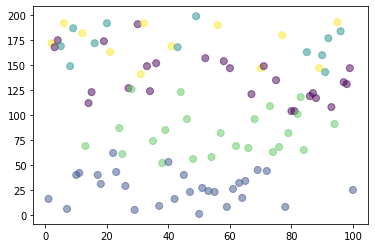

In [ ]:
kmeans = KMeans(n_clusters=5).fit(features)

plt.scatter(df['Player'], df['GP'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)

plt.show()